# Experiments for DeepEA

This notebook runs both the vanilla EA and the deep EA for comparison of convergence.

Please see the src folder for source code, there is also a poster under data.

In [ ]:
# only run this if on colab
from google.colab import drive
import sys
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Current_Activities/DeepEA')  # change this to your directory containing src

Mounted at /content/drive


In [ ]:
from src.problems.tsp import TSP
from src.ea.optimizer import Optimizer, OptimizerMode
import json

DEVICE = 'cuda'
DEPTH = 16

In [ ]:
import matplotlib.pyplot as plt

def plot_histories(h1, h2, save_name):
    # data
    x1 = h1['generation']
    y1 = h1['loss']
    x2 = h2['generation']
    y2 = h2['loss']
    
    # Plotting the two lines with different colors
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x1, y1, color='blue', label='VanillaEA')
    ax.plot(x2, y2, color='green', label='DeepEA')

    # Adding title and legend
    ax.set_title('Convergence Processes of VanillaEA and DeepEA')
    ax.legend()

    # Displaying the plot
    plt.show()
    fig.savefig(save_name, dpi=300)
    

## Trial 1 : 16-Nodes TSP, 16 depth

Setup: we are only only use verbose mode in trial 1 to better illustrate the optimization process.

In [ ]:
tsp_p = TSP(cities=16)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=True)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=True)

Vanilla Optimization

In [ ]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 16 cities, NORMAL distribution

Evolving
Current Generation: 10

Best Candidate:
Sequence: [ 6  5 13 12  4  8  1  3  2 10  9 15 14 11  7  0]
Fitness(Loss): -13.6080
Crossover Probs: None
Mutation Rate: None

Loss: 13.608041996260548

Current Generation: 20

Best Candidate:
Sequence: [ 0  6  5 13 12  4  8  1  3  2 10  9 15 14 11  7]
Fitness(Loss): -13.6080
Crossover Probs: None
Mutation Rate: None

Loss: 13.608041996260548


Convergence reached:

Results written to /content/[17-04-2023-15:09:14]-history.json.

Current Generation: 27

Best Candidate:
Sequence: [ 6  5 13 12  4  8  1  3  2 10  9 15 14 11  7  0]
Fitness(Loss): -13.6080
Crossover Probs: None
Mutation Rate: None

Loss: 13.608041996260548



<Figure size 640x480 with 0 Axes>

Deep Optimization

In [ ]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 16 cities, NORMAL distribution

Evolving

Training MLP GAN, Generation 3:

Epoch 2 loss: 0.20260924100875854
Epoch 4 loss: 0.18395556509494781
Epoch 6 loss: 0.13490448892116547
Epoch 8 loss: 7.202972483355552e-05
Epoch 10 loss: 7.347694190684706e-05
Training Complete.


Training MLP GAN, Generation 6:

Epoch 2 loss: 6.934577686479315e-05
Epoch 4 loss: 7.974206528160721e-05
Epoch 6 loss: 7.299568824237213e-05
Epoch 8 loss: 6.666880653938279e-05
Training Complete.


Training MLP GAN, Generation 9:

Epoch 2 loss: 6.306430441327393e-05
Epoch 4 loss: 7.652059139218181e-05
Training Complete.

Current Generation: 10

Best Candidate:
Sequence: [ 8 12 15 14 11  7  0  6  5 13  4  3  2 10  9  1]
Fitness(Loss): -13.7360
Crossover Probs: [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.8801494e-04 1.7202794e

<Figure size 640x480 with 0 Axes>

Plotting

In [ ]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

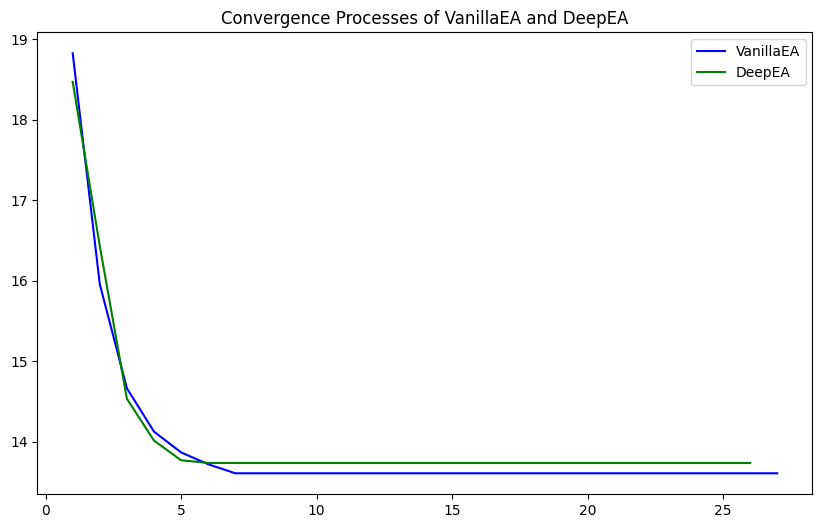

In [ ]:
plot_histories(vanilla_history, deep_history, '16-cities.png')

## Trial 2 : 28-Nodes TSP, 16 depth

Setup: we are only only use verbose mode in trial 1 to better illustrate the optimization process.

In [ ]:
tsp_p = TSP(cities=28)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=False)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=False)

Vanilla Optimization

In [ ]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 28 cities, NORMAL distribution

Evolving
...........................................................
Convergence reached:

Results written to /content/[17-04-2023-15:11:16]-history.json.

Current Generation: 59

Best Candidate:
Sequence: [23  8  3 22 12  1 10 21 27 26 17  6 13 20 14 18  4  9 24 19  7  5 15 25
  0  2 11 16]
Fitness(Loss): -19.2120
Crossover Probs: None
Mutation Rate: None

Loss: 19.211974659138598



<Figure size 640x480 with 0 Axes>

Deep Optimization

In [ ]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 28 cities, NORMAL distribution

Evolving
........................................
Convergence reached:

Results written to /content/[17-04-2023-15:12:58]-history.json.

Current Generation: 39

Best Candidate:
Sequence: [23  8  3 22 12  1 10 21 27 26 17  6 13 20 14 18  4  9 24 19  7  5 15 25
  0  2 11 16]
Fitness(Loss): -19.2120
Crossover Probs: [9.15307464e-06 2.17169054e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.10898161e-05 0.00000000e+00 1.20441955e-05
 0.00000000e+00 0.00000000e+00 1.09689092e-04 8.63364257e-05
 0.00000000e+00 0.00000000e+00 1.05546555e-04 0.00000000e+00
 7.69285689e-05 0.00000000e+00 6.62474413e-05 1.86480656e-06
 1.25274077e-04 1.26743776e-04 0.00000000e+00 1.11638103e-04
 7.02223269e-06 0.00000000e+00 0.00000000e+00 1.18705022e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e

<Figure size 640x480 with 0 Axes>

Plotting

In [ ]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

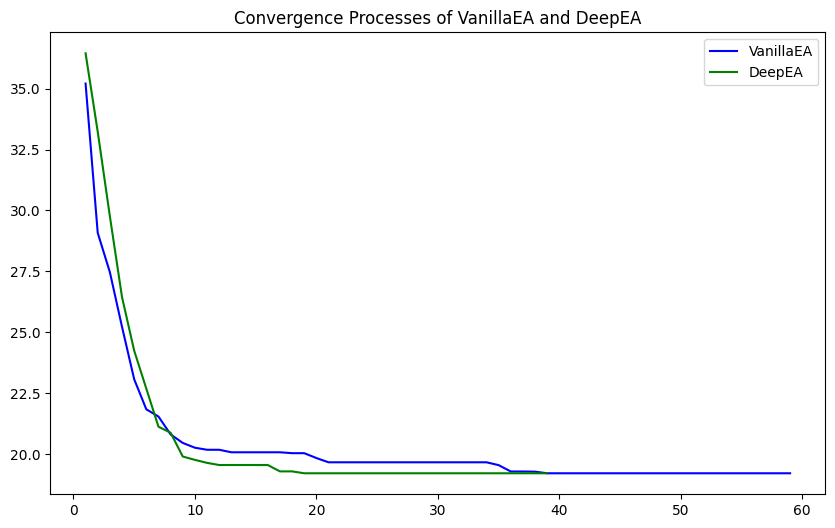

In [ ]:
plot_histories(vanilla_history, deep_history, '28-cities.png')

## Trial 3 : 40-Nodes TSP, 16 depth

Setup: we are only only use verbose mode in trial 1 to better illustrate the optimization process.

In [ ]:
tsp_p = TSP(cities=40)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=False)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=False)

Vanilla Optimization

In [ ]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 40 cities, NORMAL distribution

Evolving
...................................................
Convergence reached:

Results written to /content/[17-04-2023-15:14:15]-history.json.

Current Generation: 51

Best Candidate:
Sequence: [11 14  0 39  1 10 29  2 23 15  9 33 16 35 38 37  7  5 17 20 30 26 34 36
 24 13 27 25  8 19 32  4 21 22  3 18 12 31 28  6]
Fitness(Loss): -19.1494
Crossover Probs: None
Mutation Rate: None

Loss: 19.149403868783846



<Figure size 640x480 with 0 Axes>

Deep Optimization

In [ ]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 40 cities, NORMAL distribution

Evolving
...............................................................................
Convergence reached:

Results written to /content/[17-04-2023-15:18:31]-history.json.

Current Generation: 79

Best Candidate:
Sequence: [14  0 23 38 37  7  5 17 20 30 26 34  4 32 19  8 25 27 13 24 18 36 21 22
  3 16 35 33 15  9  2 29 10  1 39 11  6 28 31 12]
Fitness(Loss): -18.7113
Crossover Probs: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.32892016e-05 7.76728193e-05 8.90555093e-05 0.00000000e+00
 1.12787362e-04 0.00000000e+00 8.62010565e-05 0.00000000e+00
 9.43671548e-05 0.00000000e+00 4.42842684e-05 7.55686813e-07
 4.58876229e-06 0.00000000e+00 1.68384122e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.71552435e-05
 1.00326515e-05 0.00000000e+00 7.74896616e-

<Figure size 640x480 with 0 Axes>

Plotting

In [ ]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

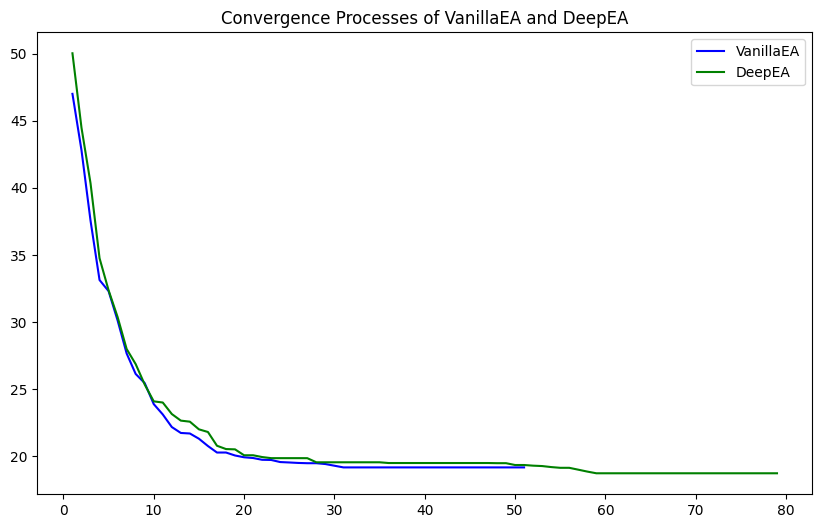

In [ ]:
plot_histories(vanilla_history, deep_history, '40-cities.png')

## Trial 4 : 52-Nodes TSP, 16 depth

Setup: we are only only use verbose mode in trial 1 to better illustrate the optimization process.

In [ ]:
tsp_p = TSP(cities=52)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=False)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=False)

Vanilla Optimization

In [ ]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 52 cities, NORMAL distribution

Evolving
...............................................................
Convergence reached:

Results written to /content/[17-04-2023-15:20:32]-history.json.

Current Generation: 63

Best Candidate:
Sequence: [45  0 13  4 42 40 11 39 29 44  1 32 24  9 27 14 46 20 17 22 19 18 37 26
 43 41 34  6 36 10 50 16 25 23 28 31  3 33 49  8  2 12  5 21 38 47 30 48
 15  7 51 35]
Fitness(Loss): -27.9891
Crossover Probs: None
Mutation Rate: None

Loss: 27.989093055376713



<Figure size 640x480 with 0 Axes>

Deep Optimization

In [ ]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 52 cities, NORMAL distribution

Evolving
..................................................
Convergence reached:

Results written to /content/[17-04-2023-15:23:40]-history.json.

Current Generation: 49

Best Candidate:
Sequence: [ 4 42 40 11 39  9 17 26 43 46 20 14 27 24 22 37 19 18 30 47 50 10 36  6
 41 34  5 12 21 38  2  8 49 33  3 31 28 25 23 16 48 15  7 13 51 35 45  0
 44  1 32 29]
Fitness(Loss): -28.0692
Crossover Probs: [0.0000000e+00 1.1864949e-05 7.2539391e-05 1.3942343e-04 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0689026e-04 0.0000000e+00 0.0000000e+00
 6.1113151e-06 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 7.3837116e-05 0.0000000e+00 3.5568821e-05
 0.0000000e+00 9.7724651e-06 0.0000000e+00 1.7731378e-05 2.2610642e-05
 1.7811333e-05 0.0000000e+00 7.7999975e-05 8.9

<Figure size 640x480 with 0 Axes>

Plotting

In [ ]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

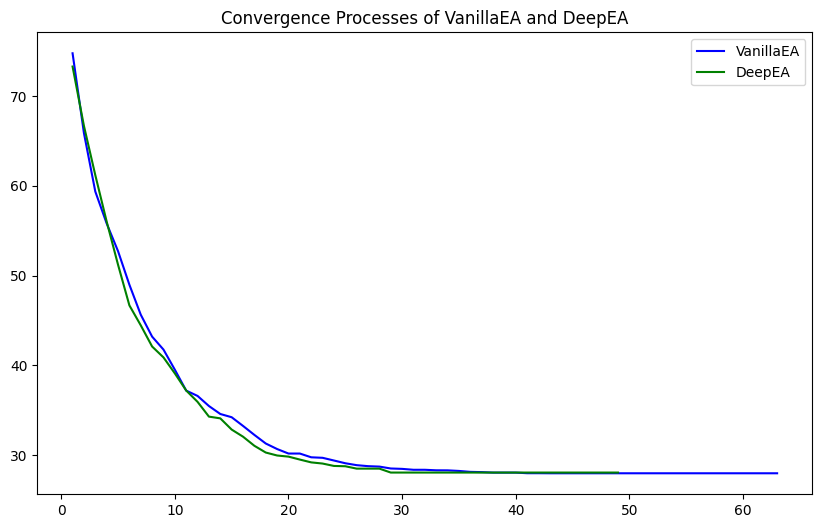

In [ ]:
plot_histories(vanilla_history, deep_history, '52-cities.png')

## Trial 5 : 64-Nodes TSP, 16 depth

Setup: we are only only use verbose mode in trial 1 to better illustrate the optimization process.

In [ ]:
tsp_p = TSP(cities=64)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=False)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=False)

Vanilla Optimization

In [ ]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 64 cities, NORMAL distribution

Evolving
......................................................................................................................
Convergence reached:

Results written to /content/[17-04-2023-15:28:15]-history.json.

Current Generation: 118

Best Candidate:
Sequence: [14 20 19 46 38 61  2 12 28 56 30 43  5 47 15  9 36 11 51 37 40 49 21 45
 53 18 55  4 41  0 44 50 29 42 48 23 34  8 32 13 63  6 31 27 59 26 39 17
  3 54 62  1  7 25 10 35 60 57 24 58 16 22 52 33]
Fitness(Loss): -28.1768
Crossover Probs: None
Mutation Rate: None

Loss: 28.176842659818103



<Figure size 640x480 with 0 Axes>

Deep Optimization

In [ ]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 64 cities, NORMAL distribution

Evolving
.....................................................
Convergence reached:

Results written to /content/[17-04-2023-15:32:14]-history.json.

Current Generation: 53

Best Candidate:
Sequence: [58 19 46 38 61 28 20  2 12 56 14 33 30 43  5 47 44 15 51  9 36 11  0 50
 29 34 23 48 42  8 27 31  6 13 63 32 59 26  4 39 55 18 17  3 22 54 35 49
 40 60 37 25  7 45 10 21 41 53 62  1 57 52 24 16]
Fitness(Loss): -30.1435
Crossover Probs: [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 2.2324994e-06 0.0000000e+00 2.8722926e-07 0.0000000e+00
 4.9942566e-05 4.2774977e-06 0.0000000e+00 1.8298595e-05 0.0000000e+00
 2.1442340e-05 4.2750820e-05 3.4221532e-05 3.5704405e-05 0.0000000e+00
 2.5180

<Figure size 640x480 with 0 Axes>

Plotting

In [ ]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

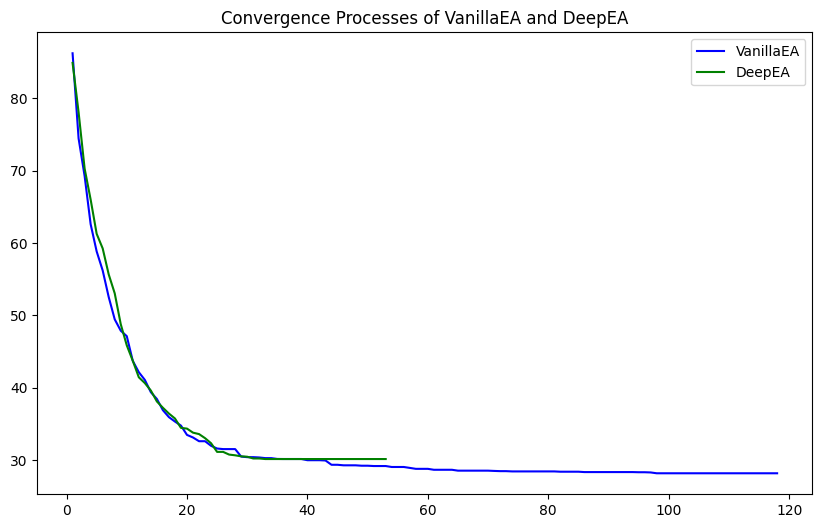

In [ ]:
plot_histories(vanilla_history, deep_history, '64-cities.png')

## Trial 6 : 76-Nodes TSP, 16 depth

Setup: we are only only use verbose mode in trial 1 to better illustrate the optimization process.

In [ ]:
tsp_p = TSP(cities=76)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=False)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=False)

Vanilla Optimization

In [ ]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 76 cities, NORMAL distribution

Evolving
...........................................................................................................................
Convergence reached:

Results written to /content/[17-04-2023-15:37:52]-history.json.

Current Generation: 123

Best Candidate:
Sequence: [61 65  1 70 41 46  9 52 10 23  0 73 67 27 48 18 64 25 24 74 11 56 71 17
 30 33 19 26 38 29 66 59 14 60 47  2 43 72  4 35 62 44 75 21 51 40 15 34
 42 13 57 49 69 50  7 22 63 36 54  5  3 20 45  6  8 39 58 68 32 28 37 16
 31 12 55 53]
Fitness(Loss): -37.4242
Crossover Probs: None
Mutation Rate: None

Loss: 37.42420803344286



<Figure size 640x480 with 0 Axes>

Deep Optimization

In [ ]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 76 cities, NORMAL distribution

Evolving
..............................................................................
Convergence reached:

Results written to /content/[17-04-2023-15:44:38]-history.json.

Current Generation: 78

Best Candidate:
Sequence: [59 14 60 39 29 38 26 19 33 30 17 71 56 75 44 11 21 62 74 18 69 27 67 73
 41 70 10  9 46 52 23 57  0 65 48 50 16 31 37 28 72 49  4 43 15 35 25 24
 40 34 13 42 51 64 68 32  2 58 47 12 22 53 55 61  7  1 63 36 54  5 20  3
 45  6  8 66]
Fitness(Loss): -39.6076
Crossover Probs: [0.0000000e+00 5.4035077e-05 0.0000000e+00 4.5143242e-05 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.8064027e-07 1.5232999e-05
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 5.2963882e-05 4.1852250e-05 1.1335098e-05 1.2100106e-05
 1.1798440e-05 4

<Figure size 640x480 with 0 Axes>

Plotting

In [ ]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

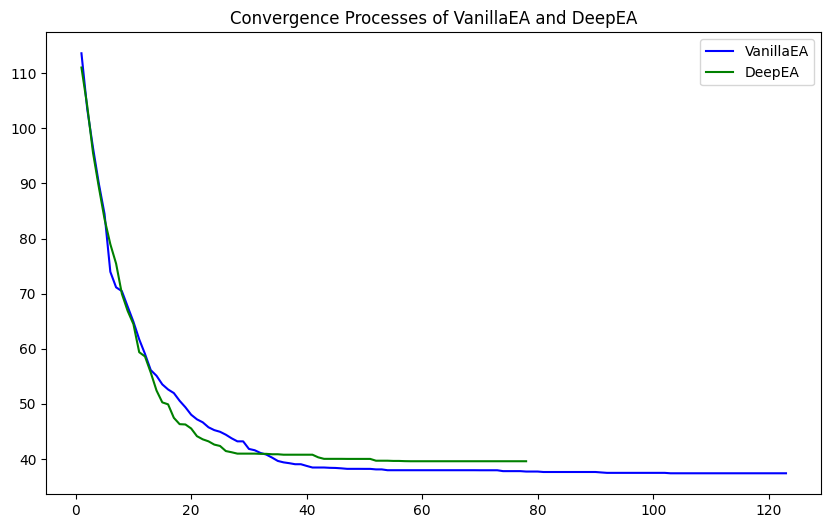

In [ ]:
plot_histories(vanilla_history, deep_history, '76-cities.png')

## Trial 7 : 88-Nodes TSP, 16 depth

Setup: we are only only use verbose mode in trial 1 to better illustrate the optimization process.

In [ ]:
tsp_p = TSP(cities=88)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=False)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=False)

Vanilla Optimization

In [ ]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 88 cities, NORMAL distribution

Evolving
........................................................................................................................................................................
Convergence reached:

Results written to /content/[17-04-2023-15:53:39]-history.json.

Current Generation: 168

Best Candidate:
Sequence: [17 10  4 13 29 73 20 85 23 80 69 84  9 18 40 30 82 38 52 39 28 76 70 21
 61 15 67 46 11 55 60 54 24 44 36 14 22 31 79 75 26 25 62 49 78 71 59 58
 83 64 66  1 34  8 42 63  5 12 74 48 51 16 41 35 47  6 86 72 50 77  0 53
 56  3 65  7 68 19 45 87 43 57 81 27 37 32 33  2]
Fitness(Loss): -43.9828
Crossover Probs: None
Mutation Rate: None

Loss: 43.982767178626126



<Figure size 640x480 with 0 Axes>

Deep Optimization

In [ ]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 88 cities, NORMAL distribution

Evolving
............................................................................................................................
Convergence reached:

Results written to /content/[17-04-2023-16:05:32]-history.json.

Current Generation: 120

Best Candidate:
Sequence: [ 8 42 86 72 50 74 48 51 16 41 10 17 76 70 37 21 23 67 20 73 13  4 29  2
 33 32 85 46 11  9 84 55 15 57 61 81 27 28 39 52 87 43 40 18 54 60 80 69
 30 82 24 44 36 78 49 71 68 59 19 31 79 22 14 26 75 25 62 65  7 58 38 83
 45  5 12 63 64  3 66  1 47 35  0 53 77 56  6 34]
Fitness(Loss): -38.4734
Crossover Probs: [0.0000000e+00 4.3031616e-07 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 4.1850020e-05 1.3025534e-05 0.0000000e+00 0.0000000e+00
 2.0723293e-05 3.9532912e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00
 7.1

<Figure size 640x480 with 0 Axes>

Plotting

In [ ]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

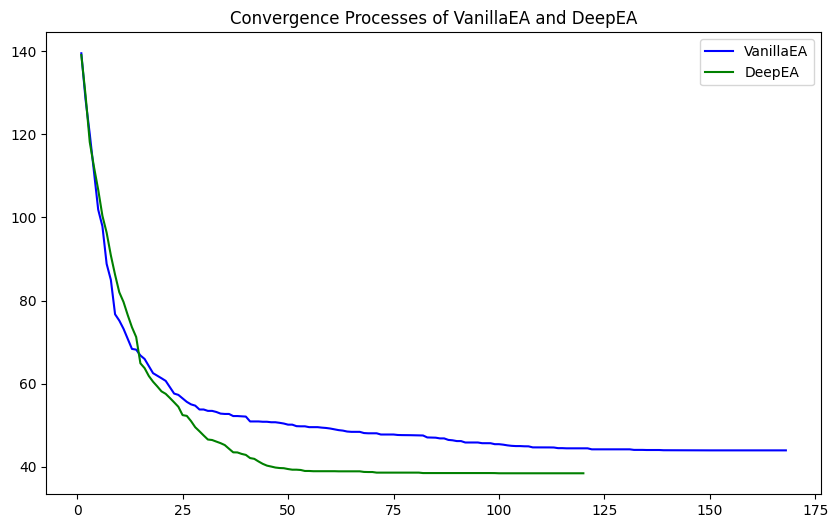

In [ ]:
plot_histories(vanilla_history, deep_history, '88-cities.png')

## Trial 8 : 100-Nodes TSP, 16 depth

Setup: we are only only use verbose mode in trial 1 to better illustrate the optimization process.

In [ ]:
tsp_p = TSP(cities=100)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=False)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=False)

Vanilla Optimization

In [ ]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 100 cities, NORMAL distribution

Evolving
.............................................................................................................................................................................................................................
Convergence reached:

Results written to /content/[17-04-2023-16:18:56]-history.json.

Current Generation: 221

Best Candidate:
Sequence: [50  9 28 44 83 20 93 81 27 63 78 10 43 66 79 69 73 62 64 15 67 18  4 71
 46 84 34 21 56 24 92 68 97 61 23 96 58 39 51 30 85 95 32 36  2 77 31 60
 26 94 29  7 45 72 13 80 48 11 59 75 37  1  0 57 55 40 87 91 33 99 35 16
 82  8 12 54 65 38 49 74  6 52 22 19 53 89 25 47 70  5 76 17 42 90 41 88
 98 14 86  3]
Fitness(Loss): -40.3670
Crossover Probs: None
Mutation Rate: None

Loss: 40.36698299683059



<Figure size 640x480 with 0 Axes>

Deep Optimization

In [ ]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 100 cities, NORMAL distribution

Evolving
.................................................................................................................
Convergence reached:

Results written to /content/[17-04-2023-16:31:34]-history.json.

Current Generation: 113

Best Candidate:
Sequence: [ 7 29 45  1 72 37 75 13 41 88 80 59 48 11  9 50 20 47 70 38 52 22 49 74
 44 83  3 28 93 81 27 63 43 78  6 10 65 19 89 95 85  4 39 71 30 51 25 91
 42 76  5 86 14 17 98 35 90 33 99 16 87 53 23 18 15 67 68 24 34 21 31 60
 77 46 84 36 57 55 40 32 58 96 82 54  8 12 97 61 66 69 79 73 62 64 92 56
 26 94  2  0]
Fitness(Loss): -41.3283
Crossover Probs: [9.5495470e-06 0.0000000e+00 3.3317021e-05 3.5934663e-05 0.0000000e+00
 0.0000000e+00 3.4301273e-05 3.0508412e-05 2.7104637e-05 3.0182640e-05
 1.4272716e-06 1.7187818e-05 0.0000000e+00 0.000

<Figure size 640x480 with 0 Axes>

Plotting

In [ ]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

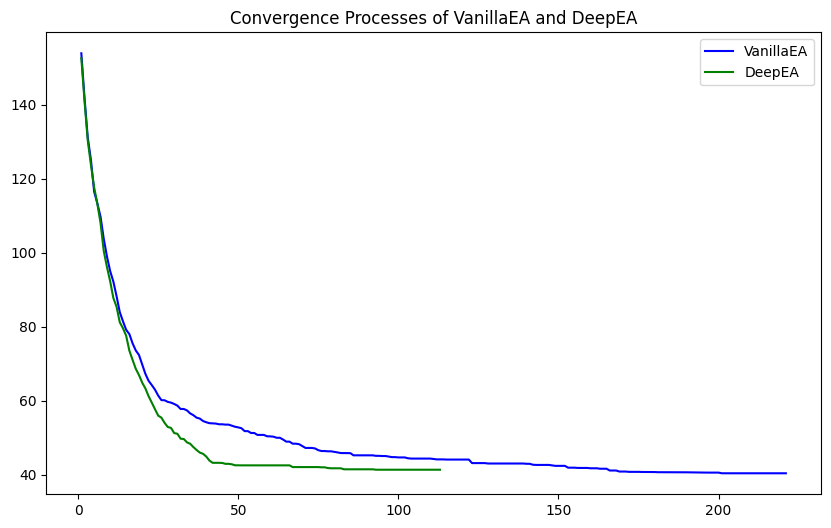

In [ ]:
plot_histories(vanilla_history, deep_history, '100-cities.png')

## Trial 9 : 112-Nodes TSP, 16 depth

Setup: we are only only use verbose mode in trial 1 to better illustrate the optimization process.

In [ ]:
tsp_p = TSP(cities=112)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=False)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=False)

Vanilla Optimization

In [ ]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 112 cities, NORMAL distribution

Evolving
........................................................................................................................................................................................................................................................
Convergence reached:

Results written to /content/[17-04-2023-16:48:29]-history.json.

Current Generation: 248

Best Candidate:
Sequence: [ 40 107  60  37  90  28  73  74   5  31   7   6 110  88  58  54  97  59
  66  92  71 108  38 102  67  53  93  45  13  63  55  56  79  23  43  75
  72  57  19  32  44  52  99  51  61  33 103  42  47  21   9  14  82  94
 101  81  22  86  17   3  26  96  78  76  25  69  27  24  34  83  95 100
  91  16  50 105  20  70  35  46  62   8  30  15  87  10   0   1  80  39
  84  49  65 111  48 109  85  12 

<Figure size 640x480 with 0 Axes>

Deep Optimization

In [ ]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 112 cities, NORMAL distribution

Evolving
............................................................................................................................................................
Convergence reached:

Results written to /content/[17-04-2023-17:07:51]-history.json.

Current Generation: 156

Best Candidate:
Sequence: [105  62  46  87  10   0  49  84  39  34  80   1  95  83 100  16  91  65
 111  48 109  11  12 107  85  73  28   5  74   6  88  37  31   7 110  90
  60  36  77  40  18   2  89  98  29   4  22  82  93  47  63  55  56  61
  51  25  33  78  94   9  45  13  67  14  81   3  26  44  52  50  57  72
  19  32  41  64 104 106  17  68  86 101  58  54  59  97  66  92 108  71
  38  53 102  21  96  99  76  75 103  42  79  23  43  69  27  24   8  30
  15  70  35  20]
Fitness(Loss): -49.4583
Crossover Prob

<Figure size 640x480 with 0 Axes>

Plotting

In [ ]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

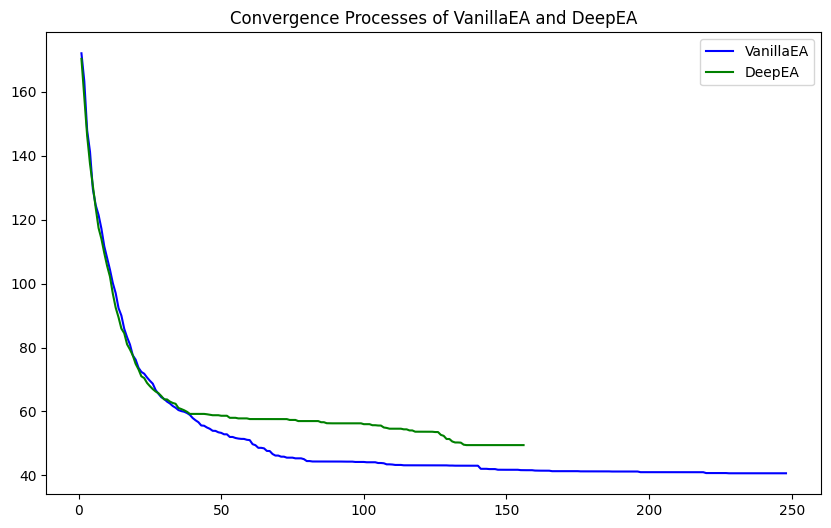

In [ ]:
plot_histories(vanilla_history, deep_history, '112-cities.png')

## Trial 10 : 124-Nodes TSP, 16 depth

Setup: we are only only use verbose mode in trial 1 to better illustrate the optimization process.

In [ ]:
tsp_p = TSP(cities=124)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=False)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=False)

Vanilla Optimization

In [ ]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 124 cities, NORMAL distribution

Evolving
..............................................................................................................................................................................................................................................................
Convergence reached:

Results written to /content/[17-04-2023-17:27:13]-history.json.

Current Generation: 254

Best Candidate:
Sequence: [ 10  71  41 100 113  40  82 114  76  62 122  33  42  83 117  18  11 106
 121  87  89  28   6  16  77  73  58   1  94  24  74  55  27  26 118 115
  59  15  85  99  32 111  66  36  47  60 103  17  68  67 112   2  46  96
 102  79  45  22  49   0  61 104  78  23  91  43  63 107   9  30  34 116
  14 109  29  12  64  31  52  98  86   4   7  21 119  48  93  90  50  38
  53  54  20  19  13  39 10

<Figure size 640x480 with 0 Axes>

Deep Optimization

In [ ]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 124 cities, NORMAL distribution

Evolving
............................................................................................
Convergence reached:

Results written to /content/[17-04-2023-17:39:47]-history.json.

Current Generation: 91

Best Candidate:
Sequence: [ 47  98  86   4   7 119  21  24 115  55  54 118  74  26  27  33  42 106
  11  18 107 122  36  20  48  93  68 112  67  90  17 103  60  52  38  31
  64  76 114  82 100 113  45 104   0  37 102  96  71  41  10   2  46  50
  40  29  12  39 105  35   8  63  95  97  91  14   3   5  44  34 116   9
  30  87  99  59  94  15  85   1  25   6 109  43  57 123  23  78  75  56
 108  51  84 120  65  88  22  49  61  79  70 110  69  92 101  80  81  77
  28  72  16  73  13 117  83  66  32 111  89  58 121  19  62  53]
Fitness(Loss): -61.2159
Crossover Probs: [1.8692379e-05

<Figure size 640x480 with 0 Axes>

Plotting

In [ ]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

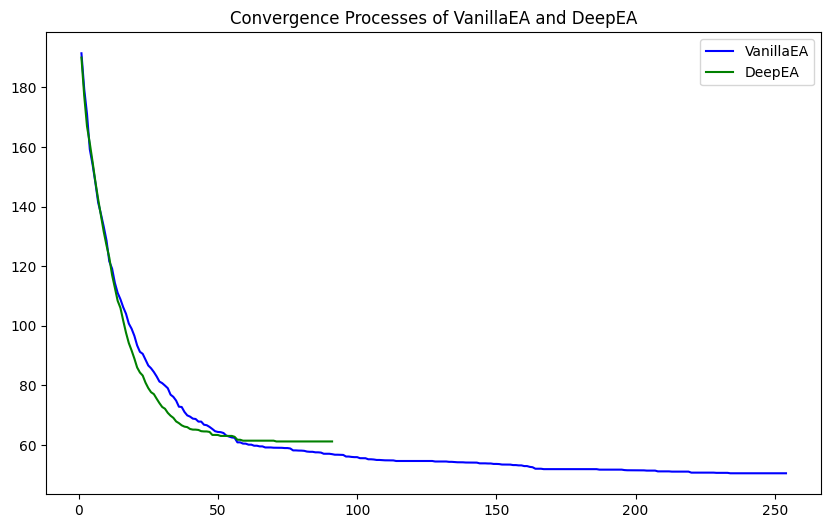

In [ ]:
plot_histories(vanilla_history, deep_history, '124-cities.png')